# Introduction
For the final project of the final course in the machine learning series, I wanted to take the opportunity to assess the impact of the different stages in text classification.

##Exploratory Data Analysis (EDA)

In [ ]:
import keras
from numpy import asarray
from numpy import zeros
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
import re
import csv
import pandas
import numpy as np
import string

#from tensorflow.contrib import rnn
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.text import one_hot
import nltk
try:
  import ktrain
except:
  !pip install ktrain
nltk.download('omw-1.4')
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPool1D, GlobalMaxPool1D, Embedding, Activation
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download('stopwords')
import ktrain
from ktrain import text
from ktrain.text import texts_from_df
from keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Load data
path = 'drive/MyDrive/'
df = pd.read_csv(path + 'train.csv')
test_df = pd.read_csv(path + 'test.csv')
sol = pd.read_csv(path + 'sample_submission.csv')

In [ ]:
#Examine overall data structure and contents
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [ ]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [ ]:
sol.head(5)

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


##Text Preprocessing
Implement helper functions to:
1. Lemmatize
2. Tokenize
3. Remove punctuation and stopwords

In [ ]:
#Define functions for Lemmatize, remove stopwords, punctuation, and tokenize.
w_tok = nltk.tokenize.word_tokenize
STEM = nltk.PorterStemmer()
LEMM = nltk.WordNetLemmatizer()

def tokenize(text, lowercase=True):
    if lowercase:
        text = text.lower()
        return w_tok(text)

def stem(tokens):
    return [STEM.stem(token) for token in tokens]

def lemmatize(tokens):
    lemm = []
    for token in tokens:
        if isinstance(token, str):
            lemm.append(LEMM.lemmatize(token)) # treats token like a noun
        else: # assume a tuple of (word, pos)
            lemm.append(LEMM.lemmatize(*token))
    return lemm

def remove_stopwords(tokens, stopwords = None):
    if stopwords is None:
        stopwords = nltk.corpus.stopwords.words("english")
    return [token for token in tokens if token not in stopwords]

def remove_punctuation(tokens):
    return [token for token in tokens if token not in string.punctuation]

def remove_links(tokens):
    return [ t for t in tokens if not t.startswith("http://") and not t.startswith("https://")]

In [ ]:
text_train = []
for i, t in enumerate(df['text']):
    text = t
    prep_text = tokenize(text)
    prep_text = remove_stopwords(prep_text)
    prep_text = remove_punctuation(prep_text)
    prep_text = lemmatize(prep_text)
    text_train.append(' '.join(prep_text))

In [ ]:
df['Prep_Text'] = text_train
target = ['Non-Disaster', 'Disaster']
df['target'].describe()

count    7613.00000
mean        0.42966
std         0.49506
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         1.00000
Name: target, dtype: float64

In [ ]:
disaster = df[df['target'] == 1]
non_disaster = df[df['target'] == 0].sample(n = 3271)

In [ ]:
total = pd.concat([disaster, non_disaster])

In [ ]:
print(df.head(5))
print(total.describe())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target                                          Prep_Text  
0       1         deed reason earthquake may allah forgive u  
1       1              forest fire near la ronge sask canada  
2       1  resident asked 'shelter place notified officer...  
3       1  13,000 people receive wildfire evacuation orde...  
4       1  got sent photo ruby alaska smoke wildfire pour...  
                 id       target
count   6542.000000  6542.000000
mean    5492.246255     0.500000
std     3137.986065     0.500038
min        1.000000     0.0

In [ ]:
t = text.Transformer('distilbert-base-uncased', maxlen = 512, class_names = target)

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
train, val, preprocess = texts_from_df(total, 'Prep_Text', label_columns = ['target'], val_df = None, max_features=20000, maxlen=512, val_pct=0.1, ngram_range=1, preprocess_mode='distilbert', verbose=1)

['not_target', 'target']
      not_target  target
2144         0.0     1.0
2448         0.0     1.0
3584         1.0     0.0
7150         0.0     1.0
6341         0.0     1.0
['not_target', 'target']
      not_target  target
6249         1.0     0.0
1637         0.0     1.0
2895         1.0     0.0
5978         1.0     0.0
5367         1.0     0.0
preprocessing train...
language: en
train sequence lengths:
	mean : 11
	95percentile : 17
	99percentile : 19


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 11
	95percentile : 17
	99percentile : 19


In [ ]:
model = preprocess.get_classifier()
learner = ktrain.get_learner(model, train_data = train, val_data = val, batch_size = 16)

In [ ]:
learner.lr_find(max_epochs = 10)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
367/367 [==============================] - 343s 908ms/step - loss: 0.6885 - accuracy: 0.5363
Epoch 2/10
367/367 [==============================] - 332s 906ms/step - loss: 0.5697 - accuracy: 0.7384
Epoch 3/10
367/367 [==============================] - 332s 905ms/step - loss: 0.4211 - accuracy: 0.8152
Epoch 4/10
367/367 [==============================] - 332s 905ms/step - loss: 0.3977 - accuracy: 0.8285
Epoch 5/10
367/367 [==============================] - 332s 905ms/step - loss: 0.5519 - accuracy: 0.6941
Epoch 6/10
367/367 [==============================] - 330s 900ms/step - loss: 0.6944 - accuracy: 0.5014
Epoch 7/10
367/367 [==============================] - 327s 890ms/step - loss: 0.7050 - accuracy: 0.5001
Epoch 8/10
367/367 [==============================] - 326s 887ms/step - loss: 0.7022 - accuracy: 0.4923
Epoch 9/10
367/367 [==============================] - 326s 887ms/step - loss: 0.7249 

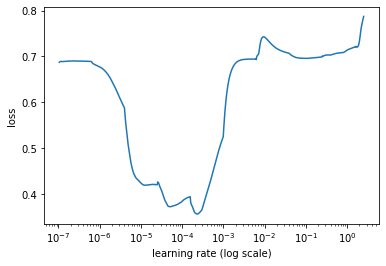

In [ ]:
learner.lr_plot()

In [ ]:
history=learner.autofit(1e-4,checkpoint_folder='checkpoint',epochs=12, early_stopping=True)



begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/12
368/368 [==============================] - 345s 915ms/step - loss: 0.4910 - accuracy: 0.7744 - val_loss: 0.4058 - val_accuracy: 0.8183
Epoch 2/12
368/368 [==============================] - 336s 910ms/step - loss: 0.3446 - accuracy: 0.8563 - val_loss: 0.4443 - val_accuracy: 0.8153
Epoch 2: early stopping
Weights from best epoch have been loaded into model.


In [ ]:
learner.save_model("drive/MyDrive/distilbertmodel_learner")

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=preprocess)

In [ ]:
validation = learner.validate(val_data = val, print_report = True)

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       323
           1       0.88      0.74      0.81       332

    accuracy                           0.82       655
   macro avg       0.83      0.82      0.82       655
weighted avg       0.83      0.82      0.82       655



In [ ]:
test = test_df['text']

In [ ]:
text_test = []
for i, t in enumerate(test):
    text = t
    prep_text = tokenize(text)
    prep_text = remove_stopwords(prep_text)
    prep_text = remove_punctuation(prep_text)
    prep_text = lemmatize(prep_text)
    text_test.append(' '.join(prep_text))

In [ ]:
test_df['Prep_Text'] = text_test

In [ ]:
print(test_df.head(5))

   id keyword location                                               text  \
0   0     NaN      NaN                 Just happened a terrible car crash   
1   2     NaN      NaN  Heard about #earthquake is different cities, s...   
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...   
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires   
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan   

                                           Prep_Text  
0                        happened terrible car crash  
1  heard earthquake different city stay safe ever...  
2  forest fire spot pond goose fleeing across str...  
3               apocalypse lighting spokane wildfire  
4              typhoon soudelor kill 28 china taiwan  


In [ ]:
p_dis = []
for i, text in enumerate(test_df['Prep_Text']):
    probs = predictor.predict(text, return_proba = True)
    p_dis.append(probs[1])

In [ ]:
results = pd.DataFrame(columns = ['id', 'target'])
results['id'] = test_df['id']
print(results.head(5))

   id target
0   0    NaN
1   2    NaN
2   3    NaN
3   9    NaN
4  11    NaN


In [ ]:
labels = [round(p) for p in p_dis]
results['target'] = labels

In [ ]:
print(results.head(5))

   id  target
0   0       1
1   2       1
2   3       1
3   9       1
4  11       1


In [ ]:
results.to_csv('drive/MyDrive/submissions.csv', header = True, index = False)

In [ ]:
vocab_size = 4000
sent_length = 200
#one_hot = [one_hot(words,vocab_size) for words in X_train]
#emb=pad_sequences(one_hot, padding='pre', maxlen=sent_length)
for line in df['Prep_Text']:
    one_hot = [one_hot(line, vocab_size)]
    emb=pad_sequences(one_hot, padding='pre', maxlen=sent_length)

In [ ]:
targets = df['target']
X_train,X_test,Y_train,Y_test = train_test_split(list(df['Prep_Text']),targets,test_size=0.2,random_state=28)

The preprocessing results show cleaned texts. Once again, we'll take a brief look at the histograms of the words per category.

In [ ]:
def build_model(bl, max_len=512):
    input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name='input_word_ids')
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name='input_mask')
    segment_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name='segment_ids')
    
    _, sequence_output = bl([input_word_ids,input_mask,segment_ids])
    clf_output = sequence_output[:, 0, :]
    clf_output_ = tf.keras.layers.Reshape((32,24))(clf_output)
    
    hidden = tf.keras.layers.Dense(128,activation='relu')(clf_output)
    hidden2 = tf.keras.layers.Dense(64,activation='relu')(hidden)
    drop = tf.keras.layers.Dropout(0.1)(hidden2)
    
    lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,
                                kernel_regularizer=tf.keras.regularizers.L2(0.001),
                                                             return_sequences=True))(clf_output_)
    drop2 = tf.keras.layers.Dropout(0.1)(lstm)
    cnn = tf.keras.layers.Conv1D(64,5,
                                kernel_regularizer=tf.keras.regularizers.L2(0.001))(drop2)
    max_pool = tf.keras.layers.MaxPooling1D(25)(cnn)
    flat = tf.keras.layers.Flatten(data_format='channels_last')(max_pool)
    
    concat = tf.keras.layers.Concatenate()([drop,flat])
    output_target = tf.keras.layers.Dense(1,activation='sigmoid')(concat)
    
    return tf.keras.Model(inputs=[input_word_ids,input_mask,segment_ids],outputs=output_target)

In [ ]:
model = build_model(df['Prep_Text'], max_len = 100)
model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=2e-6),loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.AUC()])

def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    op = tf.keras.optimizers.Adam(lr = 0.001, decay = 0.00001)
    model.compile(optimizer=op, loss='categorical_crossentropy', metrics = ['accuracy'])
    return model

# Initiate model and fit
model = cnn_model()
model.fit(train[:5000], train['target'][:5000], epochs = 15, validation_data = (train[5000:], train['target'][5000:]))
model.save('MaModel_CNN.h5')

In [ ]:
train_input = bert_encoding(X_train, tokenizer, max_len=100)
test_input = bert_encoding(X_test, tokenizer, max_len=100)
train_history = model.fit(train_input,Y_train,epochs=5,batch_size=16,validation_split=0.2)

In [ ]:
  def label_permute_compare(ytdf, yh, n=5):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    Example output: (3, 4, 1, 2, 0), 0.74 
    """
# your code here
    labels = ['business', 'tech', 'politics', 'sport', 'entertainment']
    str_perms = list(itertools.permutations(labels, n)) #permutations
    str_perms = np.asarray(str_perms) 

    try_labels = [str_perms[:, x] for x in yh]
    try_labels = np.asarray(try_labels)[:, None]
    count = [np.count_nonzero((try_labels[:, :, x]) == ytdf) for x in range(len(str_perms))]
    acc_idx = count.index(max(count))
    acc = max(count) / len(ytdf)
    order = tuple([labels.index(x) for x in str_perms[acc_idx]])
    
    return order, acc

In [ ]:
#Initiate Vectorizer
tfidf = TfidfVectorizer(min_df = 2, max_df = 0.95, norm = 'l2', stop_words = 'english')
tfidf_train = tfidf.fit_transform(train['Prep_Text'])

#Generate Model
mod = NMF(n_components = len(x), init = 'nndsvda', solver = 'mu', beta_loss = 'kullback-leibler', l1_ratio = 0.5, random_state = 1234)
mat = mod.fit_transform(tfidf_train)

In [ ]:
#Prediction output
yh_train = mat.argmax(axis = 1)

In [ ]:
labelorder, acc = label_permute_compare(train, yh_train)

The classification assigns labels randomly. The code below is to match the correct labels to each cluster, as well as create a confusion matrix for better visualization.

In [ ]:
#Create Confusion Matrix for better visualization
cluster_labels = {0: 'tech', 1: 'politics', 2: 'entertainment', 3: 'sport', 4: 'entertainment'}

label_num = [labels[i] for i in labelorder]
yh = [label_num[i] for i in yh_train]
conf_matrix = confusion_matrix(train['Category'], yh)
conf_matrix = sns.heatmap(conf_matrix, annot = True, cmap = 'Blues', fmt = 'g', linewidths = 0.1)
conf_matrix.set_title('Confusion Matrix\n\n');
conf_matrix.set_xlabel('\nPredicted');
conf_matrix.set_ylabel('Actual');

In [ ]:
#Verify
print(label_num)
print(yh_train[:10])
print(train['Category'][:10])

This verifies that we obtained the correct cluster labels. The predicted output integers represent the indices of the cluster labels. We can create a dictionary to better keep track of cluster numbers and the matching category names.

Now we will validate using the test data and see how the model performs.

In [ ]:
text_test = []
for i, t in enumerate(test['Text']):
    text = t
    prep_text = tokenize(text)
    prep_text = remove_stopwords(prep_text)
    prep_text = remove_punctuation(prep_text)
    prep_text = lemmatize(prep_text)
    text_test.append(' '.join(prep_text))

In [ ]:
test['Prep_Text'] = text_test

In [ ]:
print(test.head(5))

In [ ]:
tfidf_test = tfidf.transform(test['Prep_Text'])
mat_test = mod.transform(tfidf_test)

In [ ]:
yh_test = mat_test.argmax(axis = 1)
test['y_hat'] = yh_test
test_results = pd.DataFrame(columns = ['ArticleId', 'Category'])
test_results['ArticleId'] = test['ArticleId']
yh_cat = test['y_hat'].apply(lambda i: cluster_labels[i])
test_results['Category'] = yh_cat
print(test.tail(10))

In [ ]:
valuemf = test_results.Category.isin(train.Category).astype(int)
count = 0
for i in range(len(test_results)):
    if test_results.Category[i] == train.Category[i]:
        count += 1

print(count/len(test_results))

In [ ]:
test_results.head()

We have the test dataset and its articles classified to their predicted categories. 

#Part 2: Use the Movies data from Week 3
Now we will compare performance when Unsupervised ML technique is used on a more appropriate dataset, namely the movies and user ratings datset.

In [ ]:
#Load data
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
MV_users = pd.read_csv(path + 'users.csv')
MV_movies = pd.read_csv(path + 'movies.csv')

In [ ]:
from collections import namedtuple
Data = namedtuple('Data', ['users','movies','train','test'])
data = Data(MV_users, MV_movies, train, test)

In [ ]:
data.train.info()

In [ ]:
data.train.head()

In [ ]:
data.movies.head()

In [ ]:
from scipy.sparse import coo_matrix, csr_matrix

In [ ]:
#Calculate Movie-Feature Matrix
genres_data = data.movies.drop((['mID', 'year', 'title']), 1, inplace = False)
genres_data = np.reshape(genres_data, (3883, 18))

#Calculate Rating-Matrix (in case for later use)
allusers = list(data.users['uID'])
allmovies = list(data.movies['mID'])
genres = list(data.movies.columns.drop(['mID', 'title', 'year']))
mid2idx = dict(zip(data.movies.mID,list(range(len(data.movies)))))
uid2idx = dict(zip(data.users.uID,list(range(len(data.users)))))

ind_movie = [mid2idx[x] for x in data.train.mID]
ind_user = [uid2idx[x] for x in data.train.uID]
rating_train = list(train.rating)
rating_matrix = np.array(coo_matrix((rating_train, (ind_user, ind_movie)), shape = (len(allusers), len(allmovies))).toarray())

In [ ]:
n_users = len(data.train.mID)
n_items = len(allmovies)

df = pd.DataFrame(rating_matrix, columns = allmovies)

In [ ]:
#Observe overall distribution of ratings by looking at histogram.
train.rating.hist(grid = True)

In [ ]:
ratings_df = data.train
n_users = len(ratings_df['uID'].unique())
n_movies = len(ratings_df['mID'].unique())
R_shape = (n_users, n_movies)

X = ratings_df[['uID', 'mID']].values
y = ratings_df['rating'].values
print(X.shape)
print((y.shape))

In [ ]:
from scipy import sparse

def ToDense(X, y, shape):
    row = X[:, 0]
    col = X[:, 1]
    data = y
    matrix_sparse = sparse.csr_matrix((data, (row, col)), shape = (shape[0]+1, shape[0]+1))  # sparse matrix in compressed format (CSR)
    R = matrix_sparse.todense()   
    R = R[1:,1:]                  
    R = np.asarray(R)        
    return R

R = ToDense(X, y, R_shape)
print(R)
print(R.shape)

In [ ]:
print(len(R.nonzero()[0]) / float(R.shape[0] * R.shape[1]))

Sparsity is about a proportion of 0.0192, or 1.92%.

Now we'll use NMF from scikit-learn to generate the models.

In [ ]:
mod = NMF(n_components = 18)
mod.fit(R)
theta = mod.transform(R)
latent_f = mod.components_.T

In [ ]:
Rhat = latent_f.dot(theta.T)
Rhat = Rhat.T

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [ ]:
Rtrain = ToDense(X_train, y_train, R_shape)
Rtest = ToDense(X_test, y_test, R_shape)

In [ ]:
print(Rtrain, Rtrain.shape)
print(Rtest, Rtest.shape)

Moving on to a familiar process where we define parameters to generate NMF model.

In [ ]:
est = NMF(n_components = 18, init = 'nndsvda', solver = 'mu', beta_loss = 'kullback-leibler', l1_ratio = 0.5, random_state = 1234)

In [ ]:
from sklearn.metrics import mean_squared_error

def RMSE(p, t):
   p = p[t.nonzero()].flatten()
   t = t[t.nonzero()].flatten()
   return np.sqrt(mean_squared_error(p, t))

Upon brief overview and observation of the results, the most noticeable point, despite the task being an appropriate supervised machine learning one with predetermined labels, is the fact that there are too many missing entries in the movie ratings. In order to generate predictions for empty ratings, the algorithm must build upon a dense matrix rather than sparse, which I have attempted to do above. However, the number of nonzero datapoints available are too small relative to the hundreds of thousands of entries, causing the model to underfit the data for prediction. A way to improve this is to aggregate both user-user and item-item similarity and somehow incorporate this as factors belonging to the same parameter.